In [1]:
import csv

import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split

RANDOM_SEED = 42

# Specify each path

In [2]:
dataset = "C:/Users/metua/OneDrive/Документы/KBTU/Master's thesis/thesis project/hand-gesture-recognition-mediapipe/model/keypoint_classifier/keypoint.csv"

model_save_path = 'model/keypoint_classifier/keypoint_classifier.hdf5'
tflite_save_path = 'model/keypoint_classifier/keypoint_classifier.tflite'

# Set number of classes

In [3]:
NUM_CLASSES = 24

# Dataset reading

In [4]:
X_dataset = np.loadtxt(dataset, delimiter=',', dtype='float32', usecols=list(range(1, (21 * 2) + 1)))

In [5]:
y_dataset = np.loadtxt(dataset, delimiter=',', dtype='int32', usecols=(0))

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_dataset, y_dataset, train_size=0.75, random_state=RANDOM_SEED)

# Model building

In [7]:
# model = tf.keras.models.Sequential([
#     tf.keras.layers.Input((21 * 2, )),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(20, activation='relu'),
#     tf.keras.layers.Dropout(0.4),
#     tf.keras.layers.Dense(10, activation='relu'),
#     tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
# ])

model =  tf.keras.models.Sequential([
     tf.keras.layers.Input((21 * 2, )),
    
    # First dense layer with batch normalization and dropout
     tf.keras.layers.Dense(100, activation=None),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.ReLU(),
     tf.keras.layers.Dropout(0.2),
    
    # Second dense layer with batch normalization and dropout
     tf.keras.layers.Dense(50, activation=None),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.ReLU(),
     tf.keras.layers.Dropout(0.2),
    
    # Third dense layer with batch normalization and dropout
     tf.keras.layers.Dense(20, activation=None),
     tf.keras.layers.BatchNormalization(),
     tf.keras.layers.ReLU(),
     tf.keras.layers.Dropout(0.2),
    
    # Output layer
     tf.keras.layers.Dense(NUM_CLASSES, activation='softmax')
])

In [8]:
model.summary()  # tf.keras.utils.plot_model(model, show_shapes=True)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4300      
                                                                 
 batch_normalization (Batch  (None, 100)               400       
 Normalization)                                                  
                                                                 
 re_lu (ReLU)                (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 50)                5050      
                                                                 
 batch_normalization_1 (Bat  (None, 50)                200       
 chNormalization)                                       

In [9]:
# Model checkpoint callback
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    model_save_path, verbose=1, save_weights_only=False)
# Callback for early stopping
es_callback = tf.keras.callbacks.EarlyStopping(patience=20, verbose=1)

In [10]:
# Model compilation
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Model training

In [11]:
model.fit(
    X_train,
    y_train,
    epochs=1500,
    batch_size=128,
    validation_data=(X_test, y_test),
    callbacks=[cp_callback, es_callback]
)

Epoch 1/1500


18/22 [=======================>......] - ETA: 0s - loss: 3.1295 - accuracy: 0.1098
Epoch 1: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
22/22 [==============================] - 6s 47ms/step - loss: 3.0957 - accuracy: 0.1171 - val_loss: 3.0824 - val_accuracy: 0.1377
Epoch 2/1500
 9/22 [===========>..................] - ETA: 0s - loss: 2.8408 - accuracy: 0.1866

C:\Users\metua\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


16/22 [====================>.........] - ETA: 0s - loss: 2.7930 - accuracy: 0.1895
Epoch 2: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
22/22 [==============================] - 0s 15ms/step - loss: 2.7664 - accuracy: 0.1999 - val_loss: 2.9873 - val_accuracy: 0.1825
Epoch 3/1500
15/22 [===================>..........] - ETA: 0s - loss: 2.6108 - accuracy: 0.2797
Epoch 3: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
22/22 [==============================] - 0s 15ms/step - loss: 2.5728 - accuracy: 0.2965 - val_loss: 2.8840 - val_accuracy: 0.2831
Epoch 4/1500
16/22 [====================>.........] - ETA: 0s - loss: 2.3874 - accuracy: 0.3550
Epoch 4: saving model to model/keypoint_classifier\keypoint_classifier.hdf5
22/22 [==============================] - 0s 16ms/step - loss: 2.3761 - accuracy: 0.3552 - val_loss: 2.7524 - val_accuracy: 0.3093
Epoch 5/1500
15/22 [===================>..........] - ETA: 0s - loss: 2.2163 - accuracy: 0.3932
Epoch 5: sa

In [12]:
# Model evaluation
val_loss, val_acc = model.evaluate(X_test, y_test, batch_size=128)

8/8 [==============================] - 0s 3ms/step - loss: 0.5507 - accuracy: 0.8306


In [13]:
# Loading the saved model
model = tf.keras.models.load_model(model_save_path)

In [14]:
# Inference test
predict_result = model.predict(np.array([X_test[0]]))
print(np.squeeze(predict_result))
print(np.argmax(np.squeeze(predict_result)))

1/1 [==============================] - 0s 310ms/step
[9.9855119e-01 3.7734192e-06 4.0520399e-04 1.6432446e-07 2.7337708e-07
 2.4723896e-08 8.3820325e-08 8.6074162e-11 5.9875561e-07 1.4566790e-08
 1.3441214e-06 3.1199704e-06 5.6591972e-07 7.6199868e-08 3.7033931e-08
 3.1943961e-07 1.4784075e-07 6.6364039e-04 2.1730187e-07 3.2122223e-08
 1.9125073e-06 1.4957882e-04 2.1744026e-04 2.0920567e-07]
0


# Confusion matrix

29/29 [==============================] - 0s 3ms/step


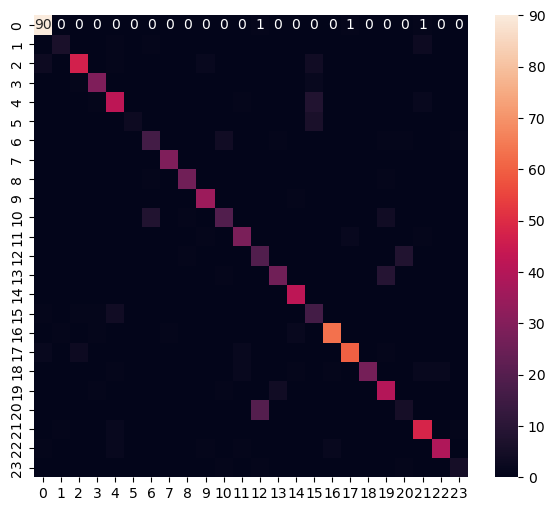

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.97      0.95        93
           1       0.75      0.55      0.63        11
           2       0.90      0.82      0.86        57
           3       0.88      0.91      0.89        32
           4       0.79      0.78      0.79        54
           5       1.00      0.33      0.50         9
           6       0.62      0.67      0.64        24
           7       0.97      1.00      0.98        29
           8       0.93      0.93      0.93        28
           9       0.90      0.97      0.93        36
          10       0.73      0.59      0.66        32
          11       0.82      0.88      0.85        32
          12       0.46      0.68      0.55        28
          13       0.84      0.72      0.78        36
          14       0.91      1.00      0.95        42
          15       0.44      0.70      0.54        23
          16       0.95      0.93      0.94        68
     

In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

def print_confusion_matrix(y_true, y_pred, report=True):
    labels = sorted(list(set(y_true)))
    cmx_data = confusion_matrix(y_true, y_pred, labels=labels)
    
    df_cmx = pd.DataFrame(cmx_data, index=labels, columns=labels)
 
    fig, ax = plt.subplots(figsize=(7, 6))
    sns.heatmap(df_cmx, annot=True, fmt='g' ,square=False)
    ax.set_ylim(len(set(y_true)), 0)
    plt.show()
    
    if report:
        print('Classification Report')
        print(classification_report(y_test, y_pred))

Y_pred = model.predict(X_test)
y_pred = np.argmax(Y_pred, axis=1)

print_confusion_matrix(y_test, y_pred)

# Convert to model for Tensorflow-Lite

In [16]:
# Save as a model dedicated to inference
model.save(model_save_path, include_optimizer=False)

C:\Users\metua\anaconda3\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [17]:
# Transform model (quantization)

converter = tf.lite.TFLiteConverter.from_keras_model(model)
converter.optimizations = [tf.lite.Optimize.DEFAULT]
tflite_quantized_model = converter.convert()

open(tflite_save_path, 'wb').write(tflite_quantized_model)

INFO:tensorflow:Assets written to: C:\Users\metua\AppData\Local\Temp\tmpr8aoxyq_\assets


INFO:tensorflow:Assets written to: C:\Users\metua\AppData\Local\Temp\tmpr8aoxyq_\assets


18976

# Inference test

In [18]:
interpreter = tf.lite.Interpreter(model_path=tflite_save_path)
interpreter.allocate_tensors()

In [19]:
# Get I / O tensor
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

In [20]:
interpreter.set_tensor(input_details[0]['index'], np.array([X_test[0]]))

In [21]:
%%time
# Inference implementation
interpreter.invoke()
tflite_results = interpreter.get_tensor(output_details[0]['index'])

CPU times: total: 0 ns
Wall time: 975 µs


In [22]:
print(np.squeeze(tflite_results))
print(np.argmax(np.squeeze(tflite_results)))

[9.98144627e-01 5.13722625e-06 5.14227257e-04 2.30112221e-07
 3.89107470e-07 3.72072861e-08 1.15756357e-07 1.30495156e-10
 8.64797073e-07 2.22055405e-08 1.76637116e-06 4.01394982e-06
 8.33108800e-07 1.06538096e-07 5.20180805e-08 4.50919970e-07
 2.04656843e-07 8.66389484e-04 2.92522344e-07 4.65775081e-08
 2.74755439e-06 1.88249047e-04 2.68973148e-04 2.92515068e-07]
0
